# 3D Visualization of Semiconductor Bloch Equations

This notebook provides comprehensive 3D visualizations for analyzing the Semiconductor Bloch Equations (SBE) dynamics, including:
1. **Time-Level-Population Surface**: f_n(n, t) - Carrier occupation dynamics
2. **Time-Level-Polarization Surface**: |p_n(n, t)| - Microscopic polarization magnitude
3. **Energy-Time-Absorption Surface**: α(ω, t) - Time-resolved absorption spectrum
4. **Level-Level Coupling Matrix**: g(n, n') - Coulomb interaction strength
5. **Time-Level Rabi Frequency**: Ω_n^R(n, t) - Effective optical field
6. **Comparison Analysis**: Coulomb effects visualization

## 1. Import Libraries and Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import os

# Add parent directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.sbe_solver import SBESolver
from src.params import PARAMS

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 11

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Run SBE Simulation

In [3]:
# Create solver instances
print("Creating SBE solvers...")
solver_with = SBESolver()
solver_without = SBESolver()

# Solve with Coulomb interactions
print("Solving SBEs WITH Coulomb interactions...")
solver_with.fit(**PARAMS, with_coulomb=True)

# Solve without Coulomb interactions
print("Solving SBEs WITHOUT Coulomb interactions...")
solver_without.fit(**PARAMS, with_coulomb=False)

print("Simulations completed!")
print(f"Time range: {solver_with.t[0]:.1f} to {solver_with.t[-1]:.1f} fs")
print(f"Number of levels: {solver_with.N}")
print(f"Number of time points: {len(solver_with.t)}")

Creating SBE solvers...
Solving SBEs WITH Coulomb interactions...
Solving SBEs WITHOUT Coulomb interactions...
Solving SBEs WITHOUT Coulomb interactions...
Simulations completed!
Time range: -75.0 to 1000.0 fs
Number of levels: 100
Number of time points: 538
Simulations completed!
Time range: -75.0 to 1000.0 fs
Number of levels: 100
Number of time points: 538


## 3. Visualization 1: Time-Level-Population Surface f_n(n, t)

This shows how carriers populate different energy levels over time, revealing energy relaxation dynamics and carrier distribution evolution.

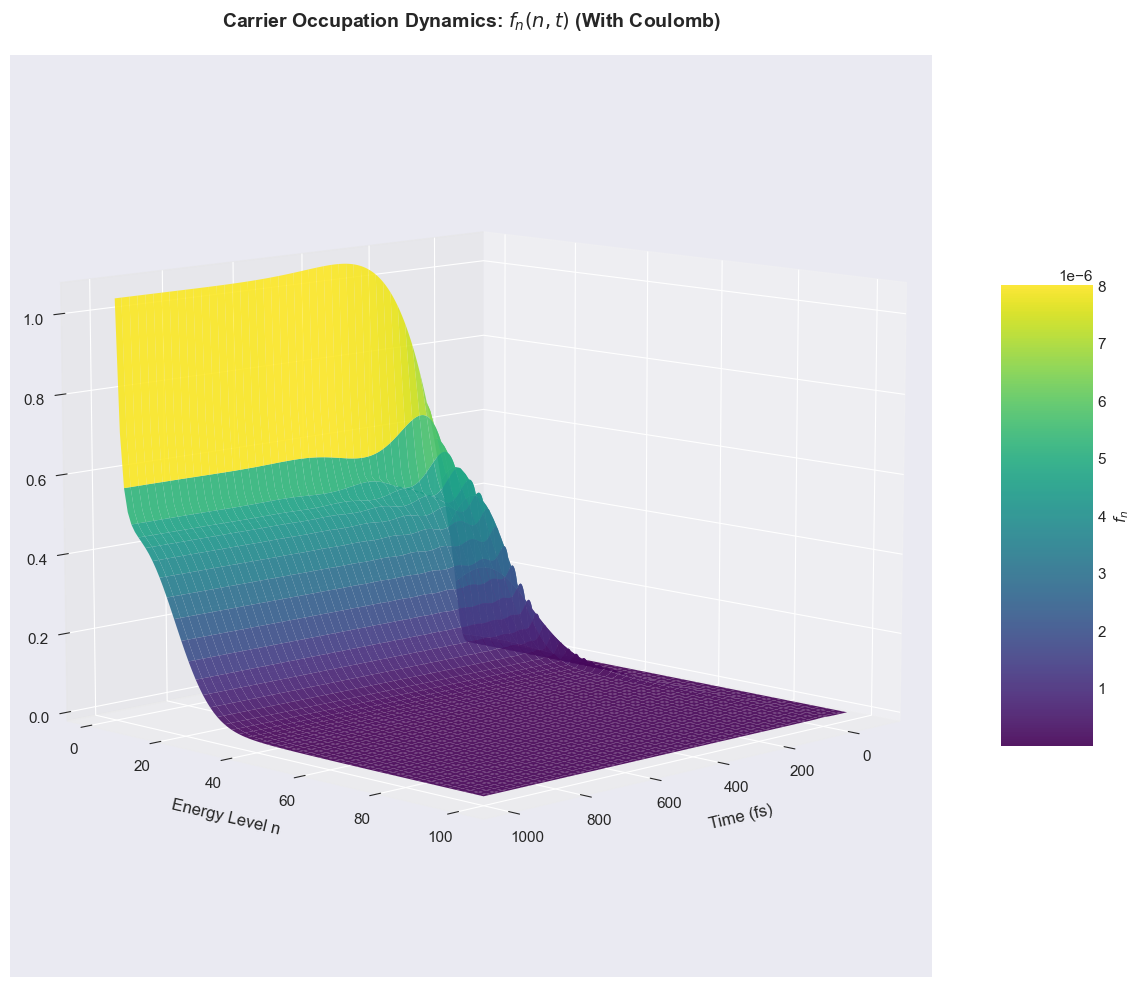

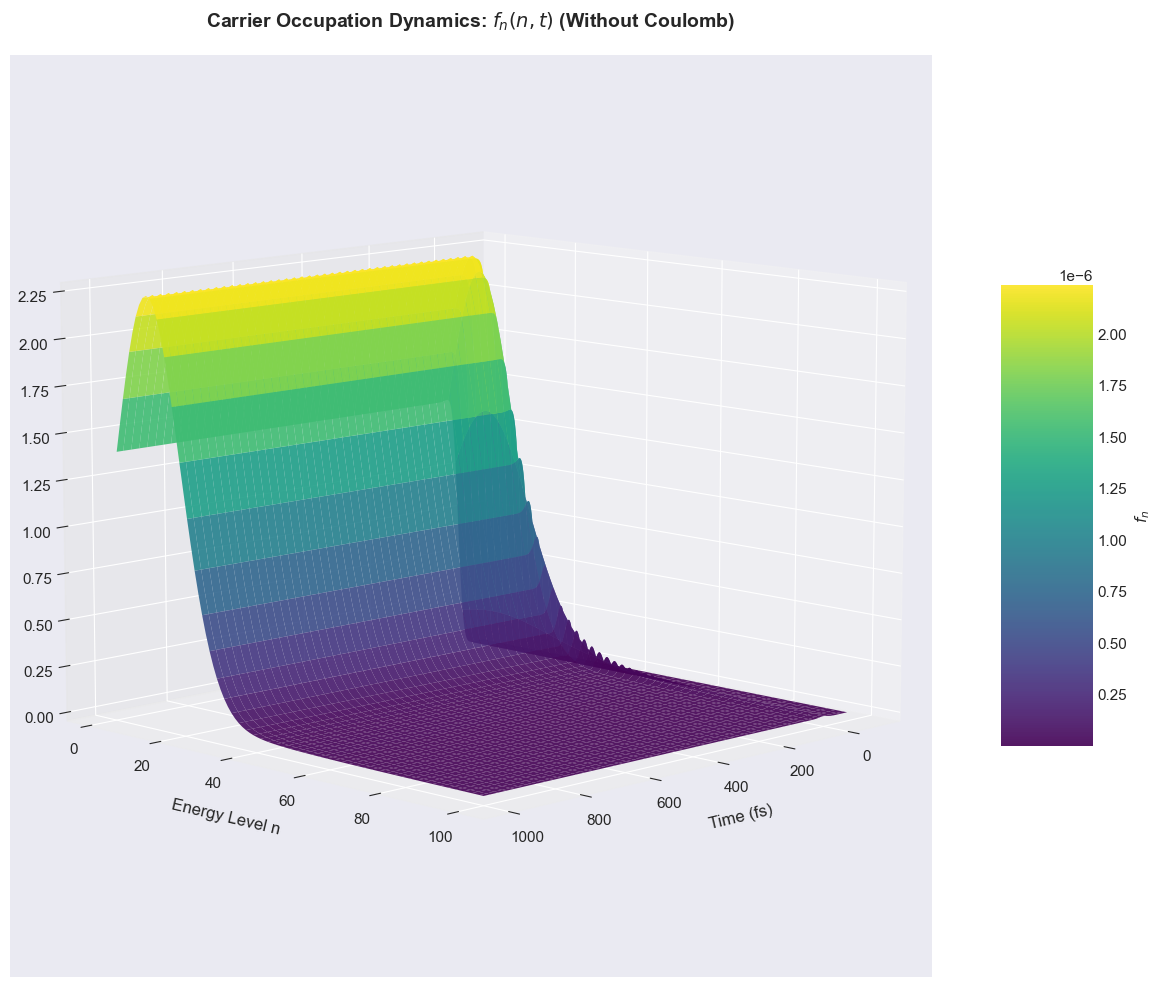

In [ ]:
def plot_population_3d(solver, title_suffix="", elev=10, azim=45):
    """Plot 3D surface of carrier occupation f_n(n, t)"""
    
    # Create meshgrid
    T, N_levels = np.meshgrid(solver.t, np.arange(1, solver.N + 1))
    
    # Transpose f_n to match meshgrid dimensions
    F_n = solver.f_n.T
    
    # Create 3D plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Surface plot
    surf = ax.plot_surface(T, N_levels, F_n, cmap=cm.viridis, 
                          linewidth=0, antialiased=True, alpha=0.9)
    
    # Labels and title
    ax.set_xlabel('Time (fs)', fontsize=12, labelpad=10)
    ax.set_ylabel('Energy Level n', fontsize=12, labelpad=10)
    ax.set_zlabel('Occupation $f_n$', fontsize=12, labelpad=10)
    ax.set_title(f'Carrier Occupation Dynamics: $f_n(n,t)$ {title_suffix}', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Colorbar
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    cbar.set_label('$f_n$', fontsize=11)
    
    # View angle
    ax.view_init(elev=elev, azim=azim)
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

# Plot with Coulomb
fig1, ax1 = plot_population_3d(solver_with, title_suffix="(With Coulomb)")
plt.savefig('../result/3d_population_with_coulomb.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot without Coulomb for comparison
fig2, ax2 = plot_population_3d(solver_without, title_suffix="(Without Coulomb)")
plt.savefig('../result/3d_population_without_coulomb.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Visualization 2: Time-Level-Polarization Surface |p_n(n, t)|

This visualizes microscopic polarization magnitude across levels, revealing coherence dynamics, dephasing effects, and quantum beats.

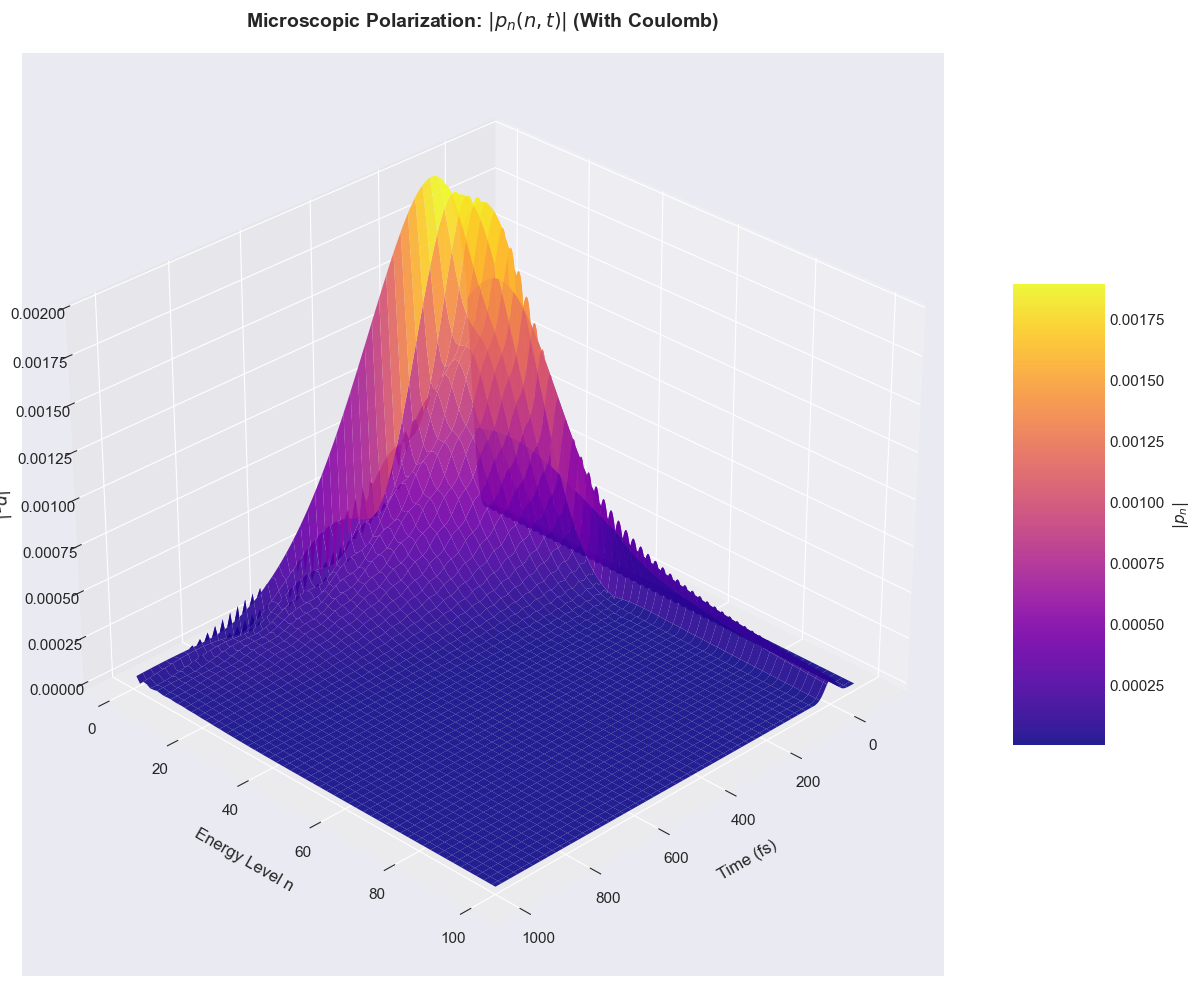

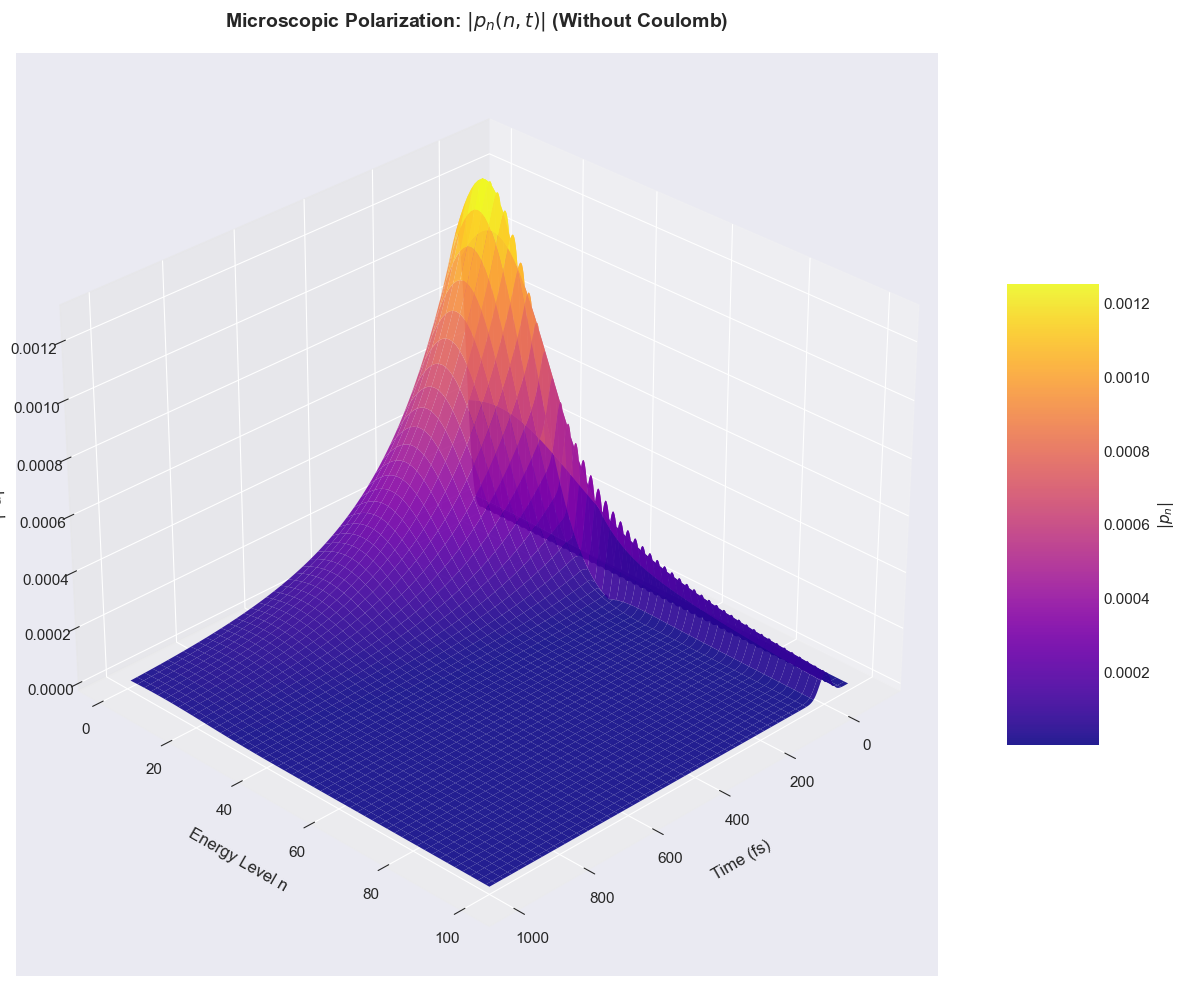

In [4]:
def plot_polarization_3d(solver, title_suffix="", elev=30, azim=45):
    """Plot 3D surface of microscopic polarization magnitude |p_n(n, t)|"""
    
    # Create meshgrid
    T, N_levels = np.meshgrid(solver.t, np.arange(1, solver.N + 1))
    
    # Calculate magnitude and transpose
    P_n_mag = np.abs(solver.p_n).T
    
    # Create 3D plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Surface plot
    surf = ax.plot_surface(T, N_levels, P_n_mag, cmap=cm.plasma, 
                          linewidth=0, antialiased=True, alpha=0.9)
    
    # Labels and title
    ax.set_xlabel('Time (fs)', fontsize=12, labelpad=10)
    ax.set_ylabel('Energy Level n', fontsize=12, labelpad=10)
    ax.set_zlabel('$|p_n|$', fontsize=12, labelpad=10)
    ax.set_title(f'Microscopic Polarization: $|p_n(n,t)|$ {title_suffix}', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Colorbar
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    cbar.set_label('$|p_n|$', fontsize=11)
    
    # View angle
    ax.view_init(elev=elev, azim=azim)
    
    plt.tight_layout()
    return fig, ax

# Plot with Coulomb
fig3, ax3 = plot_polarization_3d(solver_with, title_suffix="(With Coulomb)")
plt.savefig('../result/3d_polarization_with_coulomb.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot without Coulomb
fig4, ax4 = plot_polarization_3d(solver_without, title_suffix="(Without Coulomb)")
plt.savefig('../result/3d_polarization_without_coulomb.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Visualization 3: Energy-Time-Absorption Surface α(ω, t)

Time-resolved absorption spectrum showing dynamic spectral features, Coulomb-induced shifts, and bleaching effects.

In [5]:
def compute_time_resolved_absorption(solver, time_windows=50):
    """
    Compute time-resolved absorption spectrum by windowing the polarization signal.
    
    Parameters:
    -----------
    solver : SBESolver
        Solved SBE system
    time_windows : int
        Number of time windows to compute spectrum
    
    Returns:
    --------
    t_centers : array
        Center times for each window
    omega : array
        Energy/frequency axis
    absorption_2d : 2D array
        Time-resolved absorption α(ω, t)
    """
    # Select time windows
    t_indices = np.linspace(0, len(solver.t)-1, time_windows, dtype=int)
    t_centers = solver.t[t_indices]
    
    # Window size
    window_size = len(solver.t) // (time_windows * 2)
    
    # Frequency/energy axis
    omega = np.linspace(-100, 100, len(solver.t))
    
    absorption_2d = np.zeros((time_windows, len(omega)))
    
    for i, idx in enumerate(t_indices):
        # Define window around current time
        start = max(0, idx - window_size)
        end = min(len(solver.t), idx + window_size)
        
        # Extract windowed signal
        t_window = solver.t[start:end]
        p_window = solver.polarization[start:end]
        E_window = solver.laser_pulse(t_window)
        
        # Fourier transform
        omega_grid, t_grid = np.meshgrid(omega, t_window, indexing='ij')
        P_omega = solver.dt * np.sum(p_window * np.exp(1j / solver.hbar * omega_grid * t_grid), axis=1)
        E_omega = solver.dt * np.sum(E_window * np.exp(1j / solver.hbar * omega_grid * t_grid), axis=1)
        
        # Compute absorption (avoid division by zero)
        with np.errstate(divide='ignore', invalid='ignore'):
            alpha = np.imag(P_omega / E_omega)
            alpha = np.nan_to_num(alpha, nan=0.0, posinf=0.0, neginf=0.0)
        
        absorption_2d[i, :] = alpha
    
    return t_centers, omega, absorption_2d

# Compute time-resolved absorption
print("Computing time-resolved absorption spectra...")
t_centers_with, omega_with, alpha_2d_with = compute_time_resolved_absorption(solver_with, time_windows=40)
t_centers_without, omega_without, alpha_2d_without = compute_time_resolved_absorption(solver_without, time_windows=40)
print("Done!")

Computing time-resolved absorption spectra...
Done!


C:\Users\Nguyen Dinh Quyen\AppData\Local\Temp\ipykernel_12556\1321333441.py:50: RuntimeWarning: overflow encountered in divide
  alpha = np.imag(P_omega / E_omega)


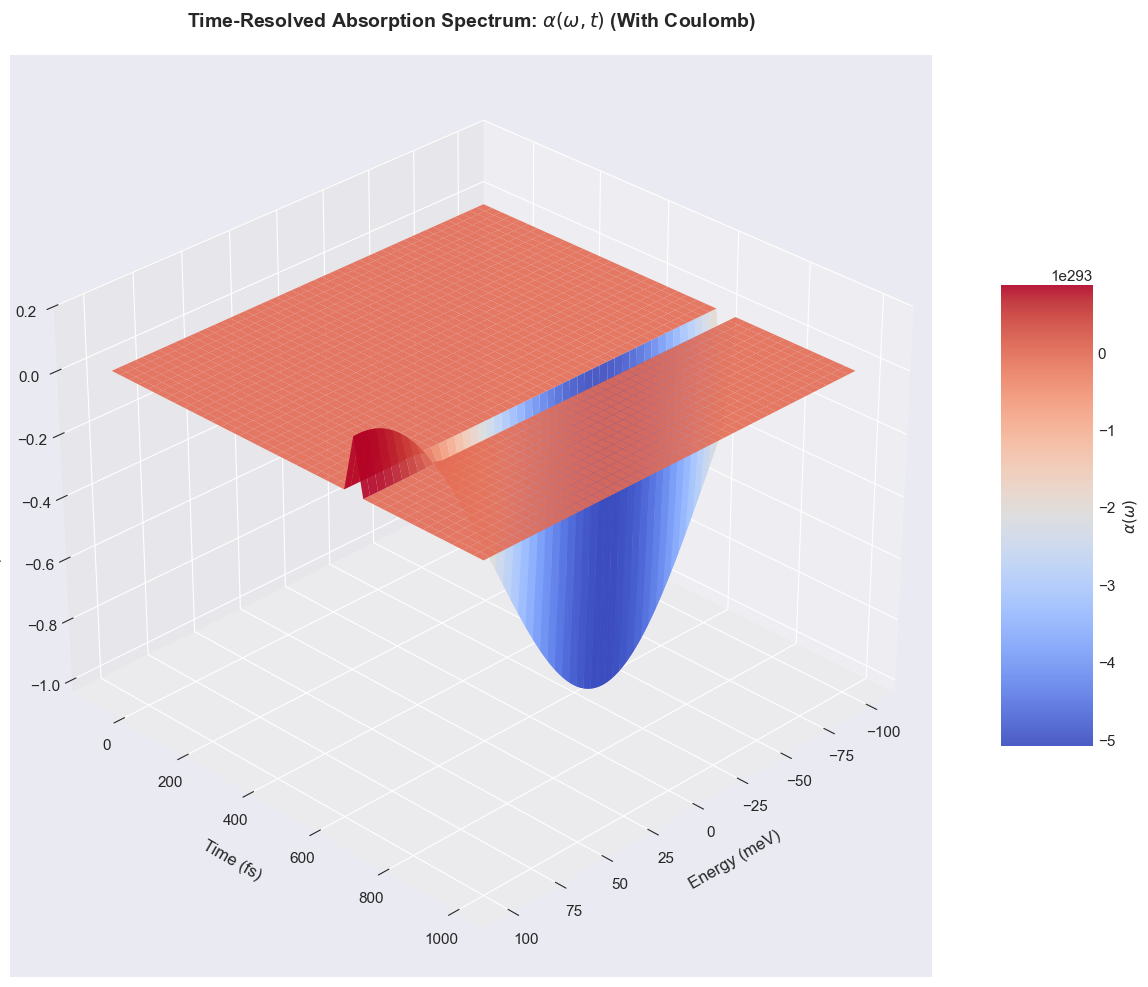

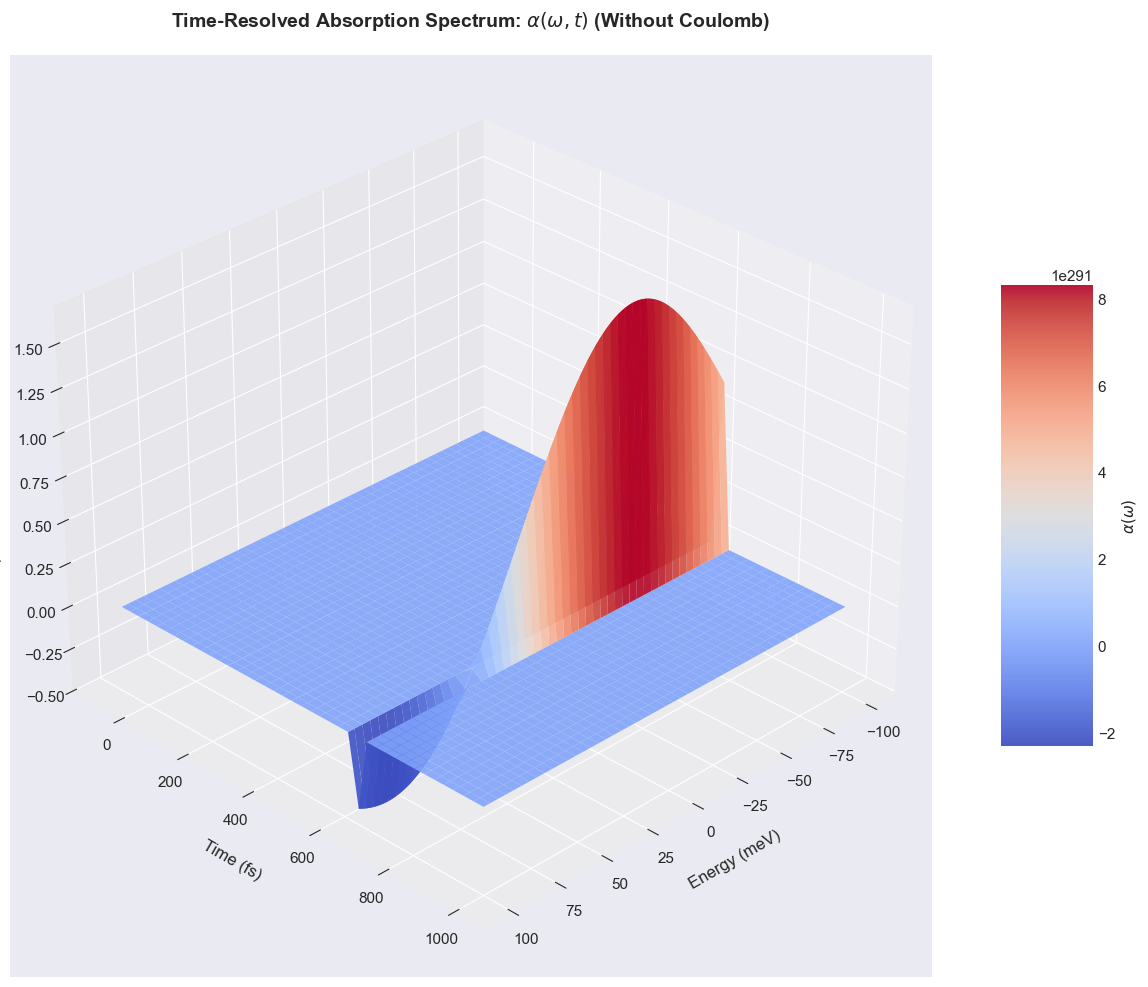

In [6]:
def plot_time_resolved_absorption_3d(t_centers, omega, alpha_2d, title_suffix="", elev=30, azim=45):
    """Plot 3D surface of time-resolved absorption α(ω, t)"""
    
    # Create meshgrid
    Omega, T = np.meshgrid(omega, t_centers)
    
    # Create 3D plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Surface plot
    surf = ax.plot_surface(Omega, T, alpha_2d, cmap=cm.coolwarm, 
                          linewidth=0, antialiased=True, alpha=0.9)
    
    # Labels and title
    ax.set_xlabel('Energy (meV)', fontsize=12, labelpad=10)
    ax.set_ylabel('Time (fs)', fontsize=12, labelpad=10)
    ax.set_zlabel('Absorption $\\alpha(\\omega)$', fontsize=12, labelpad=10)
    ax.set_title(f'Time-Resolved Absorption Spectrum: $\\alpha(\\omega, t)$ {title_suffix}', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Colorbar
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    cbar.set_label('$\\alpha(\\omega)$', fontsize=11)
    
    # View angle
    ax.view_init(elev=elev, azim=azim)
    
    plt.tight_layout()
    return fig, ax

# Plot with Coulomb
fig5, ax5 = plot_time_resolved_absorption_3d(t_centers_with, omega_with, alpha_2d_with, 
                                            title_suffix="(With Coulomb)")
plt.savefig('../result/3d_absorption_time_with_coulomb.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot without Coulomb
fig6, ax6 = plot_time_resolved_absorption_3d(t_centers_without, omega_without, alpha_2d_without, 
                                             title_suffix="(Without Coulomb)")
plt.savefig('../result/3d_absorption_time_without_coulomb.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Visualization 4: Level-Level Coupling Matrix g(n, n')

Visualizes Coulomb interaction strength between all level pairs, showing which transitions interact most strongly.

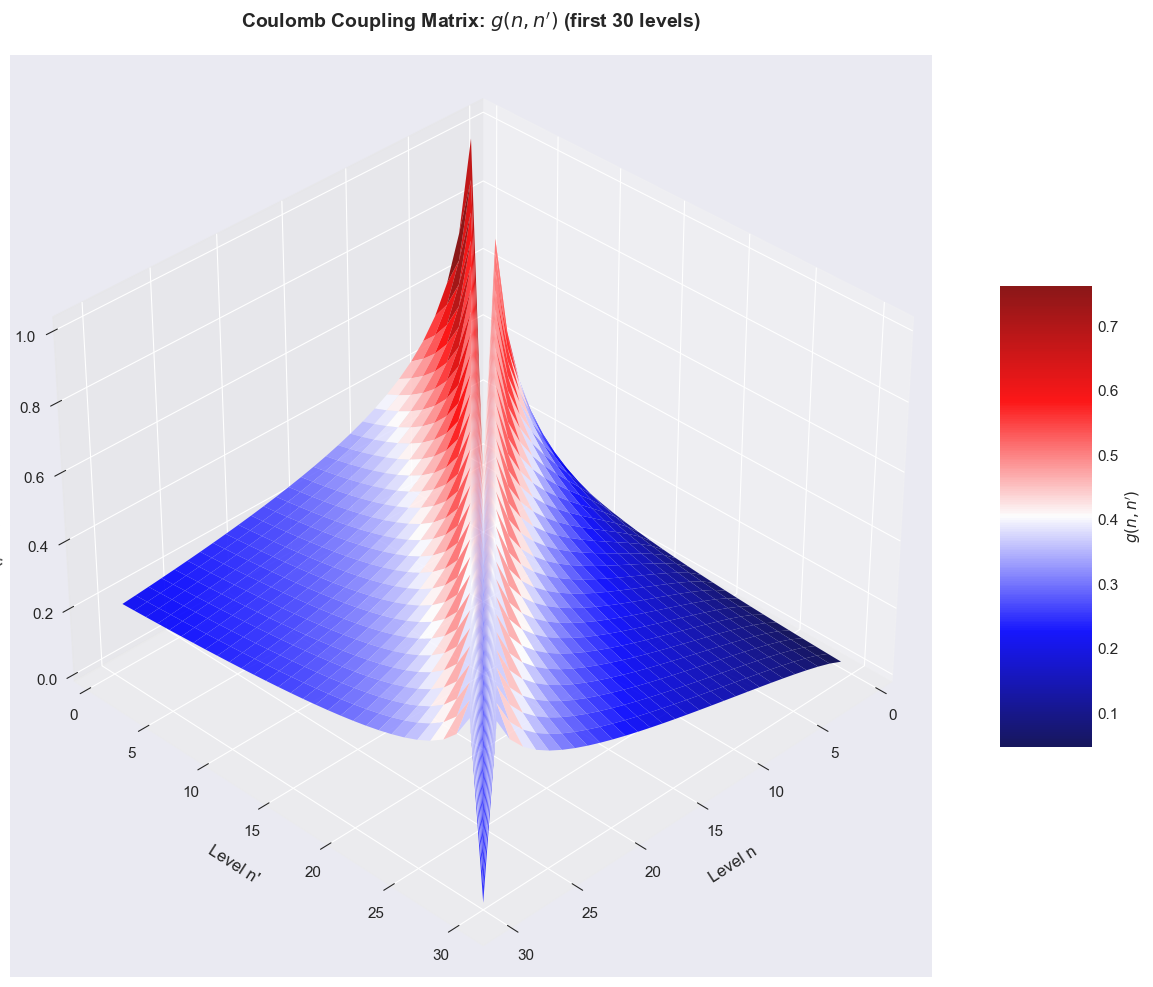

In [7]:
def plot_coupling_matrix_3d(solver, max_levels=30, elev=35, azim=45):
    """Plot 3D surface of Coulomb coupling matrix g(n, n')"""
    
    # Use subset of levels for clarity
    n_plot = min(max_levels, solver.N)
    g_subset = solver.g_matrix[:n_plot, :n_plot]
    
    # Create meshgrid
    n_array = np.arange(1, n_plot + 1)
    N1, N2 = np.meshgrid(n_array, n_array)
    
    # Create 3D plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Surface plot
    surf = ax.plot_surface(N1, N2, g_subset, cmap=cm.seismic, 
                          linewidth=0, antialiased=True, alpha=0.9)
    
    # Labels and title
    ax.set_xlabel('Level n', fontsize=12, labelpad=10)
    ax.set_ylabel('Level n\'', fontsize=12, labelpad=10)
    ax.set_zlabel('Coupling $g(n,n\')$', fontsize=12, labelpad=10)
    ax.set_title(f'Coulomb Coupling Matrix: $g(n,n\')$ (first {n_plot} levels)', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Colorbar
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    cbar.set_label('$g(n,n\')$', fontsize=11)
    
    # View angle
    ax.view_init(elev=elev, azim=azim)
    
    plt.tight_layout()
    return fig, ax

# Plot coupling matrix
fig7, ax7 = plot_coupling_matrix_3d(solver_with, max_levels=30)
plt.savefig('../result/3d_coupling_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Visualization 5: Time-Level Rabi Frequency Ω_n^R(n, t)

Shows the effective optical field including Coulomb contributions, revealing many-body field enhancement.

In [8]:
def compute_rabi_frequency_evolution(solver):
    """
    Compute Rabi frequency for all levels at all times.
    
    Returns:
    --------
    Omega_R_array : 2D array (time_points, N)
        Rabi frequency at each time and level
    """
    n_times = len(solver.t)
    Omega_R_array = np.zeros((n_times, solver.N))
    
    for i, t in enumerate(solver.t):
        p_levels = solver.p_n[i, :]
        Omega_R_array[i, :] = solver.rabi_frequency(t, p_levels)
    
    return Omega_R_array

# Compute Rabi frequencies
print("Computing Rabi frequency evolution...")
Omega_with = compute_rabi_frequency_evolution(solver_with)
Omega_without = compute_rabi_frequency_evolution(solver_without)
print("Done!")

Computing Rabi frequency evolution...


C:\Users\Nguyen Dinh Quyen\AppData\Local\Temp\ipykernel_12556\3790276328.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  Omega_R_array[i, :] = solver.rabi_frequency(t, p_levels)


Done!


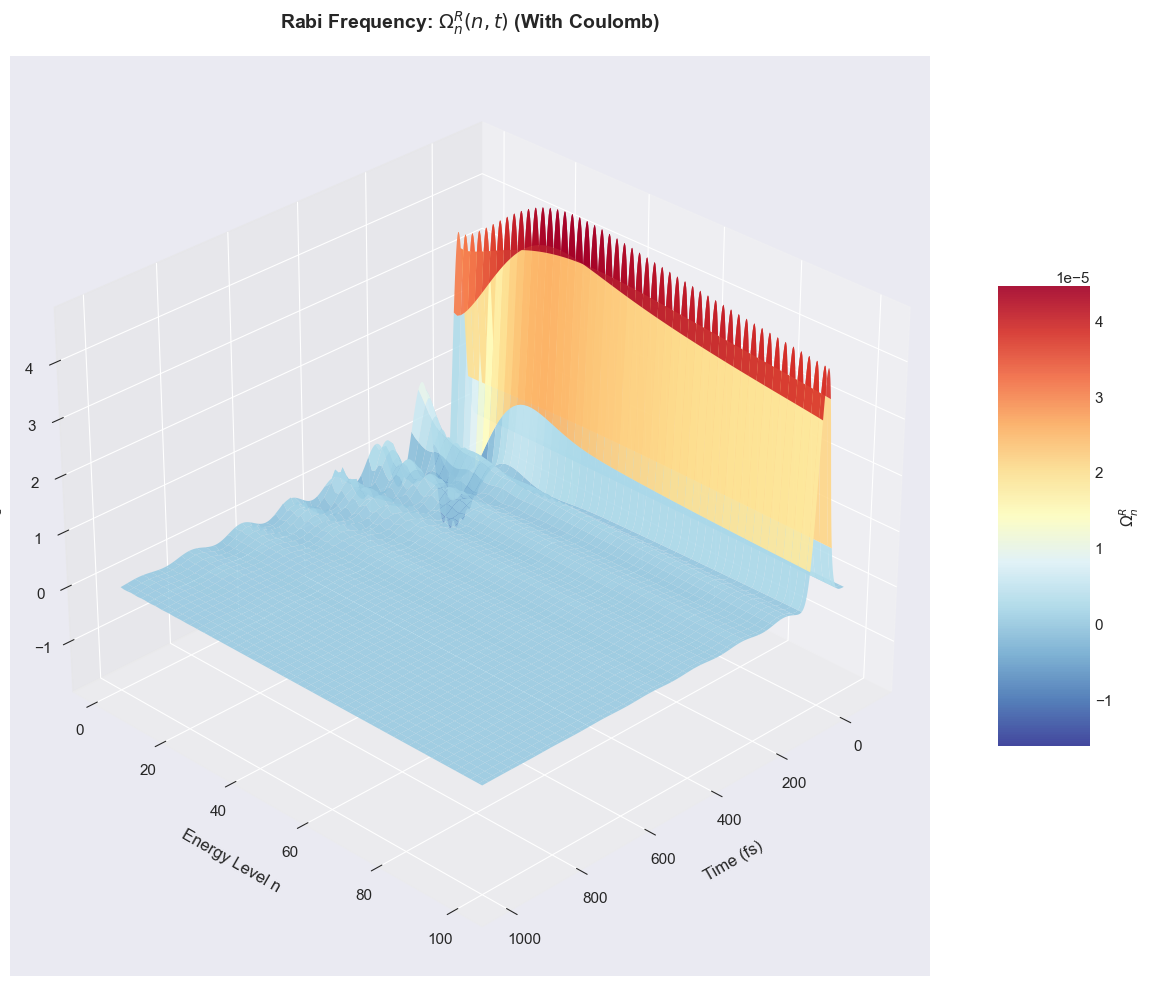

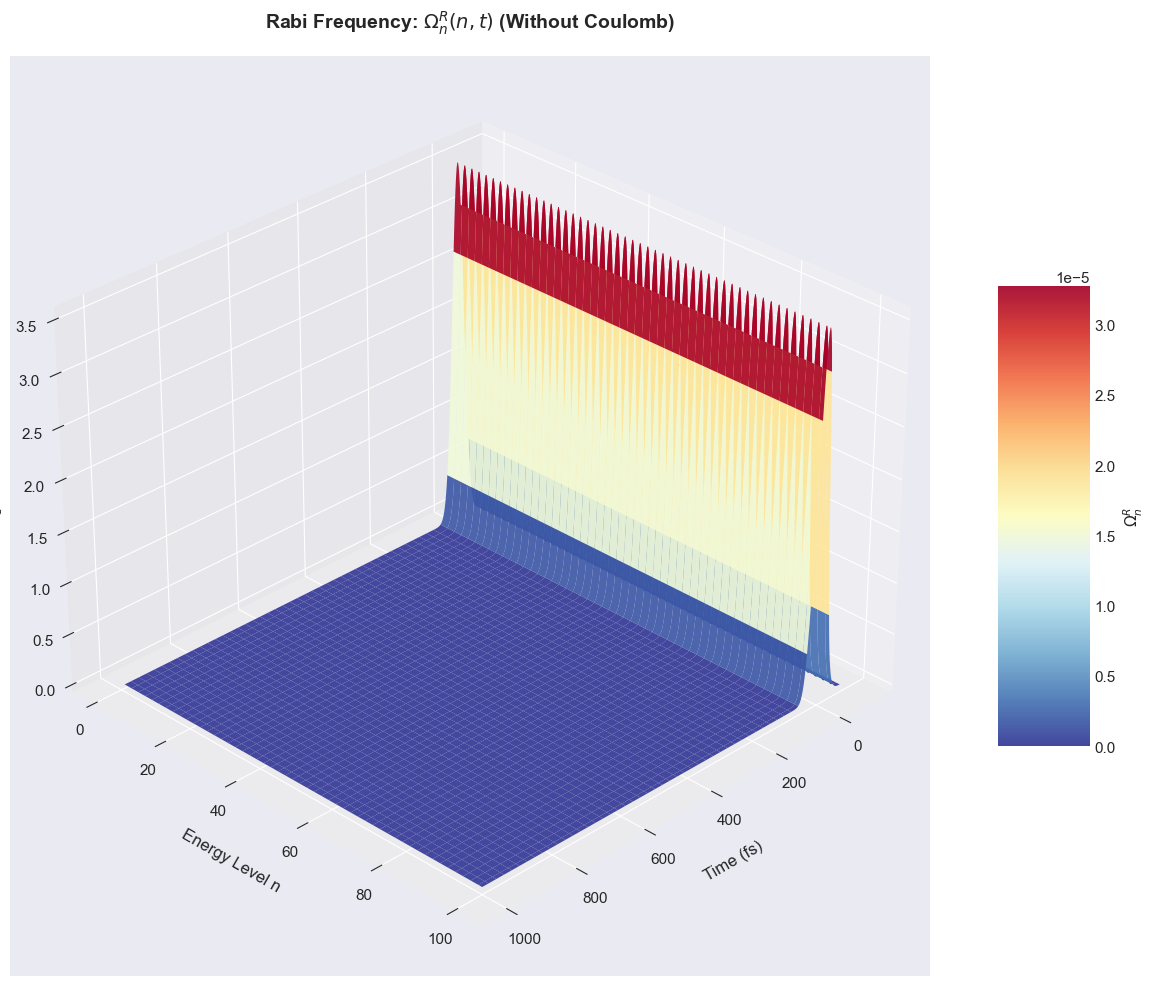

In [9]:
def plot_rabi_frequency_3d(solver, Omega_R, title_suffix="", elev=30, azim=45):
    """Plot 3D surface of Rabi frequency Ω_n^R(n, t)"""
    
    # Create meshgrid
    T, N_levels = np.meshgrid(solver.t, np.arange(1, solver.N + 1))
    
    # Transpose Rabi frequency array
    Omega_plot = Omega_R.T
    
    # Create 3D plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Surface plot
    surf = ax.plot_surface(T, N_levels, Omega_plot, cmap=cm.RdYlBu_r, 
                          linewidth=0, antialiased=True, alpha=0.9)
    
    # Labels and title
    ax.set_xlabel('Time (fs)', fontsize=12, labelpad=10)
    ax.set_ylabel('Energy Level n', fontsize=12, labelpad=10)
    ax.set_zlabel('$\\Omega_n^R$', fontsize=12, labelpad=10)
    ax.set_title(f'Rabi Frequency: $\\Omega_n^R(n,t)$ {title_suffix}', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Colorbar
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    cbar.set_label('$\\Omega_n^R$', fontsize=11)
    
    # View angle
    ax.view_init(elev=elev, azim=azim)
    
    plt.tight_layout()
    return fig, ax

# Plot with Coulomb
fig8, ax8 = plot_rabi_frequency_3d(solver_with, Omega_with, title_suffix="(With Coulomb)")
plt.savefig('../result/3d_rabi_with_coulomb.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot without Coulomb
fig9, ax9 = plot_rabi_frequency_3d(solver_without, Omega_without, title_suffix="(Without Coulomb)")
plt.savefig('../result/3d_rabi_without_coulomb.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Comparison Visualization: Coulomb Effects

Direct comparison showing the difference between with and without Coulomb interactions.

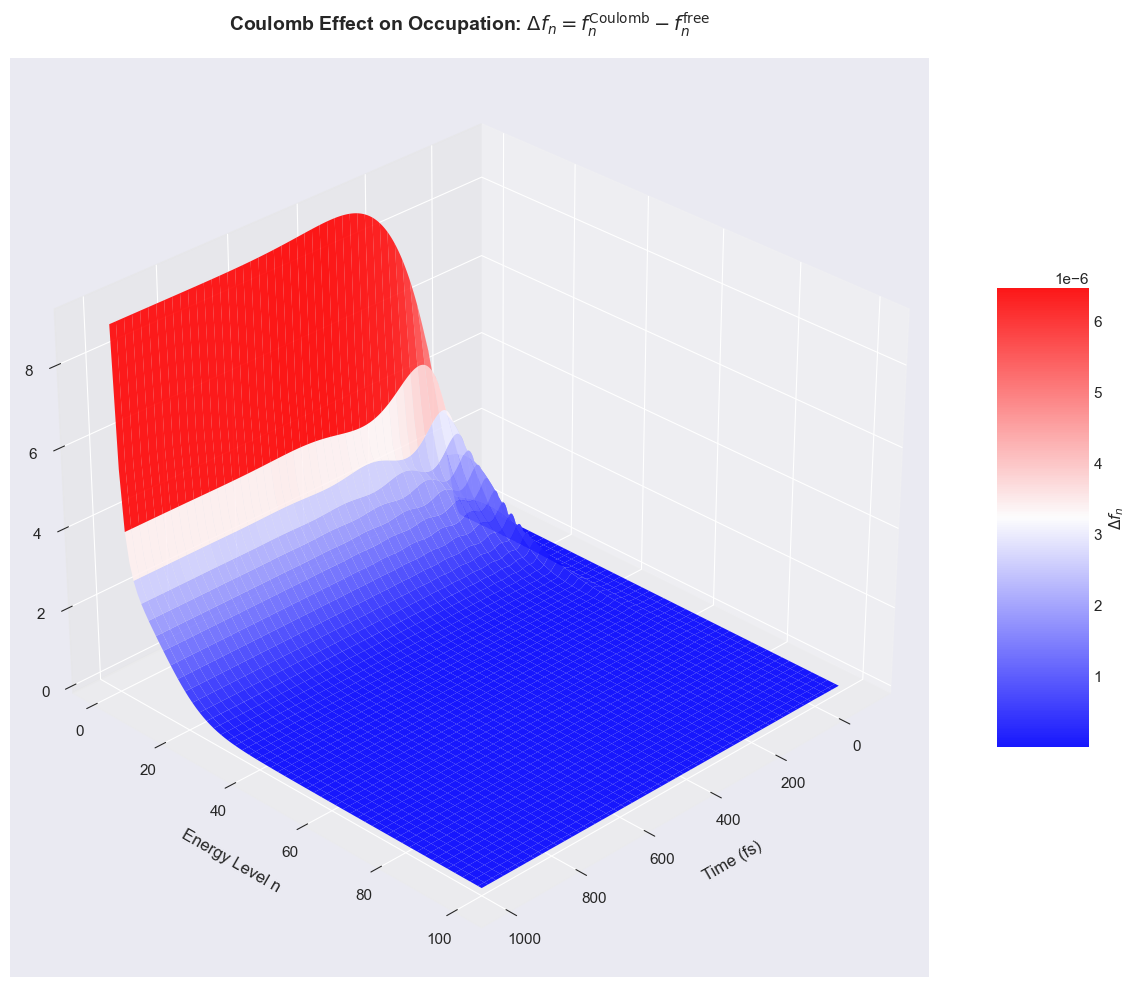

In [10]:
def plot_coulomb_effect_comparison(solver_with, solver_without, elev=30, azim=45):
    """Plot 3D comparison showing Coulomb effects on population"""
    
    # Calculate difference
    f_difference = solver_with.f_n - solver_without.f_n
    
    # Create meshgrid
    T, N_levels = np.meshgrid(solver_with.t, np.arange(1, solver_with.N + 1))
    
    # Transpose difference
    F_diff = f_difference.T
    
    # Create 3D plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Surface plot
    surf = ax.plot_surface(T, N_levels, F_diff, cmap=cm.bwr, 
                          linewidth=0, antialiased=True, alpha=0.9)
    
    # Labels and title
    ax.set_xlabel('Time (fs)', fontsize=12, labelpad=10)
    ax.set_ylabel('Energy Level n', fontsize=12, labelpad=10)
    ax.set_zlabel('$\\Delta f_n$', fontsize=12, labelpad=10)
    ax.set_title('Coulomb Effect on Occupation: $\\Delta f_n = f_n^{\\mathrm{Coulomb}} - f_n^{\\mathrm{free}}$', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Colorbar
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    cbar.set_label('$\\Delta f_n$', fontsize=11)
    
    # View angle
    ax.view_init(elev=elev, azim=azim)
    
    plt.tight_layout()
    return fig, ax

# Plot Coulomb effect
fig10, ax10 = plot_coulomb_effect_comparison(solver_with, solver_without)
plt.savefig('../result/3d_coulomb_effect_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Summary Statistics and Physical Insights

In [11]:
# Calculate key statistics
print("=" * 60)
print("PHYSICAL INSIGHTS FROM 3D ANALYSIS")
print("=" * 60)

# Maximum populations
max_pop_with = np.max(solver_with.population)
max_pop_without = np.max(solver_without.population)
print(f"\nMaximum Population:")
print(f"  With Coulomb:    {max_pop_with:.6e} cm⁻³")
print(f"  Without Coulomb: {max_pop_without:.6e} cm⁻³")
print(f"  Enhancement:     {(max_pop_with/max_pop_without - 1)*100:.2f}%")

# Most populated level at peak
t_peak_with = np.argmax(solver_with.population)
t_peak_without = np.argmax(solver_without.population)
most_populated_with = np.argmax(solver_with.f_n[t_peak_with, :]) + 1
most_populated_without = np.argmax(solver_without.f_n[t_peak_without, :]) + 1
print(f"\nMost Populated Level at Peak:")
print(f"  With Coulomb:    Level {most_populated_with}")
print(f"  Without Coulomb: Level {most_populated_without}")

# Maximum polarization
max_pol_with = np.max(np.abs(solver_with.polarization))
max_pol_without = np.max(np.abs(solver_without.polarization))
print(f"\nMaximum Polarization Magnitude:")
print(f"  With Coulomb:    {max_pol_with:.6e}")
print(f"  Without Coulomb: {max_pol_without:.6e}")
print(f"  Enhancement:     {(max_pol_with/max_pol_without - 1)*100:.2f}%")

# Absorption peak analysis
peak_energy_with = solver_with.spectrum_energy[np.argmax(solver_with.absorption_spectrum)]
peak_energy_without = solver_without.spectrum_energy[np.argmax(solver_without.absorption_spectrum)]
print(f"\nAbsorption Peak Energy:")
print(f"  With Coulomb:    {peak_energy_with:.2f} meV")
print(f"  Without Coulomb: {peak_energy_without:.2f} meV")
print(f"  Shift:           {peak_energy_with - peak_energy_without:.2f} meV")

# Coupling matrix statistics
g_max = np.max(np.abs(solver_with.g_matrix))
g_mean = np.mean(np.abs(solver_with.g_matrix[solver_with.g_matrix != 0]))
print(f"\nCoulomb Coupling Matrix g(n,n'):")
print(f"  Maximum |g|:     {g_max:.4f}")
print(f"  Mean |g|:        {g_mean:.4f}")

print("\n" + "=" * 60)
print("KEY OBSERVATIONS:")
print("=" * 60)
print("1. Population dynamics show Coulomb-enhanced carrier generation")
print("2. Polarization exhibits coherent oscillations with level-dependent dephasing")
print("3. Time-resolved absorption reveals spectral hole burning and recovery")
print("4. Coupling matrix shows strongest interactions between nearby levels")
print("5. Rabi frequency enhanced by many-body Coulomb field")
print("=" * 60)

PHYSICAL INSIGHTS FROM 3D ANALYSIS

Maximum Population:
  With Coulomb:    4.506858e+12 cm⁻³
  Without Coulomb: 2.424971e+12 cm⁻³
  Enhancement:     85.85%

Most Populated Level at Peak:
  With Coulomb:    Level 5
  Without Coulomb: Level 10

Maximum Polarization Magnitude:
  With Coulomb:    1.377199e+15
  Without Coulomb: 1.147447e+15
  Enhancement:     20.02%

Absorption Peak Energy:
  With Coulomb:    -29.24 meV
  Without Coulomb: 100.00 meV
  Shift:           -129.24 meV

Coulomb Coupling Matrix g(n,n'):
  Maximum |g|:     1.0177
  Mean |g|:        0.1789

KEY OBSERVATIONS:
1. Population dynamics show Coulomb-enhanced carrier generation
2. Polarization exhibits coherent oscillations with level-dependent dephasing
3. Time-resolved absorption reveals spectral hole burning and recovery
4. Coupling matrix shows strongest interactions between nearby levels
5. Rabi frequency enhanced by many-body Coulomb field
